In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [5]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [6]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [7]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [8]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

21386.22

In [9]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [10]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [11]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-01-16 06:00:00+00:00  21175.01  21446.81  20620.55  21144.04   
        2023-01-17 06:00:00+00:00  21144.89  21547.99  21030.00  21298.05   
        2023-01-18 06:00:00+00:00  21292.67  21620.00  20373.11  20807.07   
        2023-01-19 06:00:00+00:00  20809.00  21200.00  20644.40  20975.45   
        2023-01-20 06:00:00+00:00  20974.85  21418.55  20861.95  21381.42   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00     0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.013400          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-01-16 06:00:00+00:00  6753.837480     149521.0  21075.987049  
        2023-01-17 06:00:00+00:00  4785.065281     116641.0  21228.927798  
        2023-01-18 06:00:00+00:00  6517.204572     153671.0  20967.937823  
        2023-01-19 06:00:00+00:00  4358.484560      86447.0  20948.572198  
        2023-01-20 06:00:00+00:00  2864.316977      54053.0  21156.465136  

[988 rows x 7 columns]

In [12]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-01-16 06:00:00+00:00  21175.01  21446.81  20620.55  21144.04   
        2023-01-17 06:00:00+00:00  21144.89  21547.99  21030.00  21298.05   
        2023-01-18 06:00:00+00:00  21292.67  21620.00  20373.11  20807.07   
        2023-01-19 06:00:00+00:00  20809.00  21200.00  20644.40  20975.45   
        2023-01-20 06:00:00+00:00  20974.85  21418.55  20861.95  21381.42   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00     0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.013400          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-01-16 06:00:00+00:00  6753.837480     149521.0  21075.987049  
        2023-01-17 06:00:00+00:00  4785.065281     116641.0  21228.927798  
        2023-01-18 06:00:00+00:00  6517.204572     153671.0  20967.937823  
        2023-01-19 06:00:00+00:00  4358.484560      86447.0  20948.572198  
        2023-01-20 06:00:00+00:00  2864.316977      54053.0  21156.465136  

[988 rows x 7 columns]

In [13]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 988 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-01-20 06:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         988 non-null    float64
 1   high         988 non-null    float64
 2   low          988 non-null    float64
 3   close        988 non-null    float64
 4   volume       988 non-null    float64
 5   trade_count  988 non-null    float64
 6   vwap         988 non-null    float64
dtypes: float64(7)
memory usage: 97.2+ KB


In [14]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08 05:00:00+00:00,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14 05:00:00+00:00,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22 05:00:00+00:00,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28 05:00:00+00:00,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30 05:00:00+00:00,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
983,BTC/USD,2023-01-16 06:00:00+00:00,21175.01,21446.81,20620.55,21144.04,6753.837480,149521.0,21075.987049
984,BTC/USD,2023-01-17 06:00:00+00:00,21144.89,21547.99,21030.00,21298.05,4785.065281,116641.0,21228.927798
985,BTC/USD,2023-01-18 06:00:00+00:00,21292.67,21620.00,20373.11,20807.07,6517.204572,153671.0,20967.937823
986,BTC/USD,2023-01-19 06:00:00+00:00,20809.00,21200.00,20644.40,20975.45,4358.484560,86447.0,20948.572198


In [15]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
983,BTC/USD,2023-01-16,21175.01,21446.81,20620.55,21144.04,6753.837480,149521.0,21075.987049
984,BTC/USD,2023-01-17,21144.89,21547.99,21030.00,21298.05,4785.065281,116641.0,21228.927798
985,BTC/USD,2023-01-18,21292.67,21620.00,20373.11,20807.07,6517.204572,153671.0,20967.937823
986,BTC/USD,2023-01-19,20809.00,21200.00,20644.40,20975.45,4358.484560,86447.0,20948.572198


In [16]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot

symbol,BTC/USD
timestamp,
2020-04-08,7314.00
2020-04-14,7100.00
2020-04-22,7118.50
2020-04-28,7836.00
2020-04-30,8653.00
...,...
2023-01-16,21144.04
2023-01-17,21298.05
2023-01-18,20807.07


In [17]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [18]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-08,NaN
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
...,...
2023-01-16,-0.001462
2023-01-17,0.007284
2023-01-18,-0.023053


In [19]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [20]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
2020-05-01,0.018895
...,...
2023-01-16,-0.001462
2023-01-17,0.007284
2023-01-18,-0.023053


In [21]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 2020-04-14 to 2023-01-20
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  987 non-null    float64
dtypes: float64(1)
memory usage: 15.4+ KB


In [22]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [23]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [24]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [25]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [26]:
# Display as dataframe
historical_quotes.df

open      high       low   close  \
symbol timestamp                                                       
SPY    2020-04-08 04:00:00+00:00  267.96  276.0000  265.2542  274.00   
       2020-04-09 04:00:00+00:00  277.58  281.2000  275.4700  278.22   
       2020-04-13 04:00:00+00:00  277.14  277.5100  271.4100  275.63   
       2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80   
       2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75   
...                                  ...       ...       ...     ...   
TLT    2023-01-13 05:00:00+00:00  107.10  107.8000  106.3800  106.75   
       2023-01-17 05:00:00+00:00  105.67  106.6600  105.6500  106.06   
       2023-01-18 05:00:00+00:00  108.46  108.7700  107.1200  108.63   
       2023-01-19 05:00:00+00:00  108.10  108.3700  107.4400  107.95   
       2023-01-20 05:00:00+00:00  106.96  107.2400  106.1100  106.48   

                                       volume  trade_count        vwap  
symbol timestamp                                                        
SPY    2020-04-08 04:00:00+00:00  153774487.0     950859.0  271.051454  
       2020-04-09 04:00:00+00:00  190283195.0    1171999.0  278.251697  
       2020-04-13 04:00:00+00:00  114868253.0     752225.0  274.512847  
       2020-04-14 04:00:00+00:00  134143470.0     761246.0  282.089774  
       2020-04-15 04:00:00+00:00  121779042.0     711140.0  277.826041  
...                                       ...          ...         ...  
TLT    2023-01-13 05:00:00+00:00   17840329.0     116831.0  106.959244  
       2023-01-17 05:00:00+00:00   13921156.0      94452.0  106.156371  
       2023-01-18 05:00:00+00:00   35501528.0     175859.0  108.208918  
       2023-01-19 05:00:00+00:00   17194653.0      94747.0  107.963038  
       2023-01-20 05:00:00+00:00   11005921.0      83306.0  106.623782  

[2106 rows x 7 columns]

In [27]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open      high       low   close  \
symbol timestamp                                                       
SPY    2020-04-08 04:00:00+00:00  267.96  276.0000  265.2542  274.00   
       2020-04-09 04:00:00+00:00  277.58  281.2000  275.4700  278.22   
       2020-04-13 04:00:00+00:00  277.14  277.5100  271.4100  275.63   
       2020-04-14 04:00:00+00:00  280.98  284.9000  275.5106  283.80   
       2020-04-15 04:00:00+00:00  277.57  283.9407  275.4600  277.75   
...                                  ...       ...       ...     ...   
TLT    2023-01-13 05:00:00+00:00  107.10  107.8000  106.3800  106.75   
       2023-01-17 05:00:00+00:00  105.67  106.6600  105.6500  106.06   
       2023-01-18 05:00:00+00:00  108.46  108.7700  107.1200  108.63   
       2023-01-19 05:00:00+00:00  108.10  108.3700  107.4400  107.95   
       2023-01-20 05:00:00+00:00  106.96  107.2400  106.1100  106.48   

                                       volume  trade_count        vwap  
symbol timestamp                                                        
SPY    2020-04-08 04:00:00+00:00  153774487.0     950859.0  271.051454  
       2020-04-09 04:00:00+00:00  190283195.0    1171999.0  278.251697  
       2020-04-13 04:00:00+00:00  114868253.0     752225.0  274.512847  
       2020-04-14 04:00:00+00:00  134143470.0     761246.0  282.089774  
       2020-04-15 04:00:00+00:00  121779042.0     711140.0  277.826041  
...                                       ...          ...         ...  
TLT    2023-01-13 05:00:00+00:00   17840329.0     116831.0  106.959244  
       2023-01-17 05:00:00+00:00   13921156.0      94452.0  106.156371  
       2023-01-18 05:00:00+00:00   35501528.0     175859.0  108.208918  
       2023-01-19 05:00:00+00:00   17194653.0      94747.0  107.963038  
       2023-01-20 05:00:00+00:00   11005921.0      83306.0  106.623782  

[2106 rows x 7 columns]

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2106 entries, ('SPY', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-01-20 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2106 non-null   float64
 1   high         2106 non-null   float64
 2   low          2106 non-null   float64
 3   close        2106 non-null   float64
 4   volume       2106 non-null   float64
 5   trade_count  2106 non-null   float64
 6   vwap         2106 non-null   float64
dtypes: float64(7)
memory usage: 143.2+ KB


In [29]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,SPY,2020-04-08 04:00:00+00:00,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
1,SPY,2020-04-09 04:00:00+00:00,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
2,SPY,2020-04-13 04:00:00+00:00,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
3,SPY,2020-04-14 04:00:00+00:00,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
4,SPY,2020-04-15 04:00:00+00:00,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
2101,TLT,2023-01-13 05:00:00+00:00,107.10,107.8000,106.3800,106.75,17840329.0,116831.0,106.959244
2102,TLT,2023-01-17 05:00:00+00:00,105.67,106.6600,105.6500,106.06,13921156.0,94452.0,106.156371
2103,TLT,2023-01-18 05:00:00+00:00,108.46,108.7700,107.1200,108.63,35501528.0,175859.0,108.208918
2104,TLT,2023-01-19 05:00:00+00:00,108.10,108.3700,107.4400,107.95,17194653.0,94747.0,107.963038


In [30]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2106 non-null   object             
 1   timestamp    2106 non-null   datetime64[ns, UTC]
 2   open         2106 non-null   float64            
 3   high         2106 non-null   float64            
 4   low          2106 non-null   float64            
 5   close        2106 non-null   float64            
 6   volume       2106 non-null   float64            
 7   trade_count  2106 non-null   float64            
 8   vwap         2106 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 148.2+ KB


In [31]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,SPY,2020-04-08,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
1,SPY,2020-04-09,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
2,SPY,2020-04-13,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
3,SPY,2020-04-14,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
4,SPY,2020-04-15,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
2101,TLT,2023-01-13,107.10,107.8000,106.3800,106.75,17840329.0,116831.0,106.959244
2102,TLT,2023-01-17,105.67,106.6600,105.6500,106.06,13921156.0,94452.0,106.156371
2103,TLT,2023-01-18,108.46,108.7700,107.1200,108.63,35501528.0,175859.0,108.208918
2104,TLT,2023-01-19,108.10,108.3700,107.4400,107.95,17194653.0,94747.0,107.963038


In [32]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,SPY,2020-04-08,267.96,276.0000,265.2542,274.000,153774487.0,950859.0,271.051454
1,SPY,2020-04-09,277.58,281.2000,275.4700,278.220,190283195.0,1171999.0,278.251697
2,SPY,2020-04-13,277.14,277.5100,271.4100,275.630,114868253.0,752225.0,274.512847
3,SPY,2020-04-14,280.98,284.9000,275.5106,283.800,134143470.0,761246.0,282.089774
4,SPY,2020-04-15,277.57,283.9407,275.4600,277.750,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
697,SPY,2023-01-13,393.62,399.1000,393.3400,398.500,63634516.0,465835.0,396.840190
698,SPY,2023-01-17,398.48,400.2300,397.0600,397.770,62485876.0,436151.0,398.195099
699,SPY,2023-01-18,399.01,400.1200,391.2800,391.490,99651010.0,643581.0,394.553482
700,SPY,2023-01-19,389.36,391.0800,387.2600,388.640,86958919.0,548675.0,389.265344


In [33]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot

symbol,SPY
timestamp,
2020-04-08,274.000
2020-04-09,278.220
2020-04-13,275.630
2020-04-14,283.800
2020-04-15,277.750
...,...
2023-01-13,398.500
2023-01-17,397.770
2023-01-18,391.490


In [34]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 2020-04-08 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     702 non-null    float64
dtypes: float64(1)
memory usage: 11.0+ KB


In [35]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily

symbol,SPY
timestamp,
2020-04-08,NaN
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
...,...
2023-01-13,0.003879
2023-01-17,-0.001832
2023-01-18,-0.015788


In [36]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily

symbol,SPY
timestamp,
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
2020-04-16,0.004356
...,...
2023-01-13,0.003879
2023-01-17,-0.001832
2023-01-18,-0.015788


In [37]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
702,GLD,2020-04-08,155.91,155.940,154.5900,154.6500,7600804.0,60704.0,155.233884
703,GLD,2020-04-09,158.08,159.080,157.2100,158.5800,18123039.0,140239.0,158.255634
704,GLD,2020-04-13,159.17,162.380,158.6250,161.4100,20549213.0,140401.0,160.906373
705,GLD,2020-04-14,162.73,164.420,161.7800,162.6600,17095086.0,146336.0,163.197557
706,GLD,2020-04-15,161.80,162.540,160.8061,162.0000,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
1399,GLD,2023-01-13,176.96,178.825,176.8934,178.7600,7459612.0,56564.0,178.143640
1400,GLD,2023-01-17,178.21,178.240,177.0900,177.5900,6652652.0,48336.0,177.618035
1401,GLD,2023-01-18,178.92,179.180,176.9000,177.0800,5385579.0,43167.0,177.823818
1402,GLD,2023-01-19,178.37,180.030,178.0900,179.8900,6678687.0,57860.0,179.046522


In [38]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot

symbol,GLD
timestamp,
2020-04-08,154.6500
2020-04-09,158.5800
2020-04-13,161.4100
2020-04-14,162.6600
2020-04-15,162.0000
...,...
2023-01-13,178.7600
2023-01-17,177.5900
2023-01-18,177.0800


In [39]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 2020-04-08 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     702 non-null    float64
dtypes: float64(1)
memory usage: 11.0+ KB


In [40]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily

symbol,GLD
timestamp,
2020-04-08,NaN
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
...,...
2023-01-13,0.012002
2023-01-17,-0.006545
2023-01-18,-0.002872


In [41]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily

symbol,GLD
timestamp,
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
2020-04-16,-0.001790
...,...
2023-01-13,0.012002
2023-01-17,-0.006545
2023-01-18,-0.002872


In [42]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
1404,TLT,2020-04-08,165.11,166.19,164.13,165.09,10147077.0,63686.0,165.217491
1405,TLT,2020-04-09,164.28,165.79,163.78,165.39,14260806.0,82515.0,164.996594
1406,TLT,2020-04-13,164.75,165.71,163.88,163.88,8750297.0,60771.0,164.679842
1407,TLT,2020-04-14,163.84,164.74,163.48,163.84,9019531.0,62051.0,164.073826
1408,TLT,2020-04-15,166.80,168.60,166.74,168.18,10027752.0,63827.0,167.874800
...,...,...,...,...,...,...,...,...,...
2101,TLT,2023-01-13,107.10,107.80,106.38,106.75,17840329.0,116831.0,106.959244
2102,TLT,2023-01-17,105.67,106.66,105.65,106.06,13921156.0,94452.0,106.156371
2103,TLT,2023-01-18,108.46,108.77,107.12,108.63,35501528.0,175859.0,108.208918
2104,TLT,2023-01-19,108.10,108.37,107.44,107.95,17194653.0,94747.0,107.963038


In [43]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot

symbol,TLT
timestamp,
2020-04-08,165.09
2020-04-09,165.39
2020-04-13,163.88
2020-04-14,163.84
2020-04-15,168.18
...,...
2023-01-13,106.75
2023-01-17,106.06
2023-01-18,108.63


In [44]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 2020-04-08 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     702 non-null    float64
dtypes: float64(1)
memory usage: 11.0+ KB


In [45]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily

symbol,TLT
timestamp,
2020-04-08,NaN
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
...,...
2023-01-13,-0.009373
2023-01-17,-0.006464
2023-01-18,0.024232


In [46]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily

symbol,TLT
timestamp,
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
2020-04-16,0.011357
...,...
2023-01-13,-0.009373
2023-01-17,-0.006464
2023-01-18,0.024232


In [47]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod

symbol,BTC/USD
timestamp,
2020-04-14,0.970741
2020-04-22,0.973270
2020-04-28,1.071370
2020-04-30,1.183074
2020-05-01,1.205428
...,...
2023-01-16,2.890900
2023-01-17,2.911957
2023-01-18,2.844828


In [48]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod

symbol,SPY
timestamp,
2020-04-09,1.015401
2020-04-13,1.005949
2020-04-14,1.035766
2020-04-15,1.013686
2020-04-16,1.018102
...,...
2023-01-13,1.454380
2023-01-17,1.451715
2023-01-18,1.428796


In [49]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod

symbol,GLD
timestamp,
2020-04-09,1.025412
2020-04-13,1.043712
2020-04-14,1.051794
2020-04-15,1.047527
2020-04-16,1.045651
...,...
2023-01-13,1.155900
2023-01-17,1.148335
2023-01-18,1.145037


In [50]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod

symbol,TLT
timestamp,
2020-04-09,1.001817
2020-04-13,0.992671
2020-04-14,0.992428
2020-04-15,1.018717
2020-04-16,1.030287
...,...
2023-01-13,0.646617
2023-01-17,0.642437
2023-01-18,0.658005


In [51]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit

symbol,BTC/USD
timestamp,
2020-04-14,9707.410446
2020-04-22,9732.704403
2020-04-28,10713.699754
2020-04-30,11830.735576
2020-05-01,12054.279464
...,...
2023-01-16,28908.996445
2023-01-17,29119.565217
2023-01-18,28448.277276


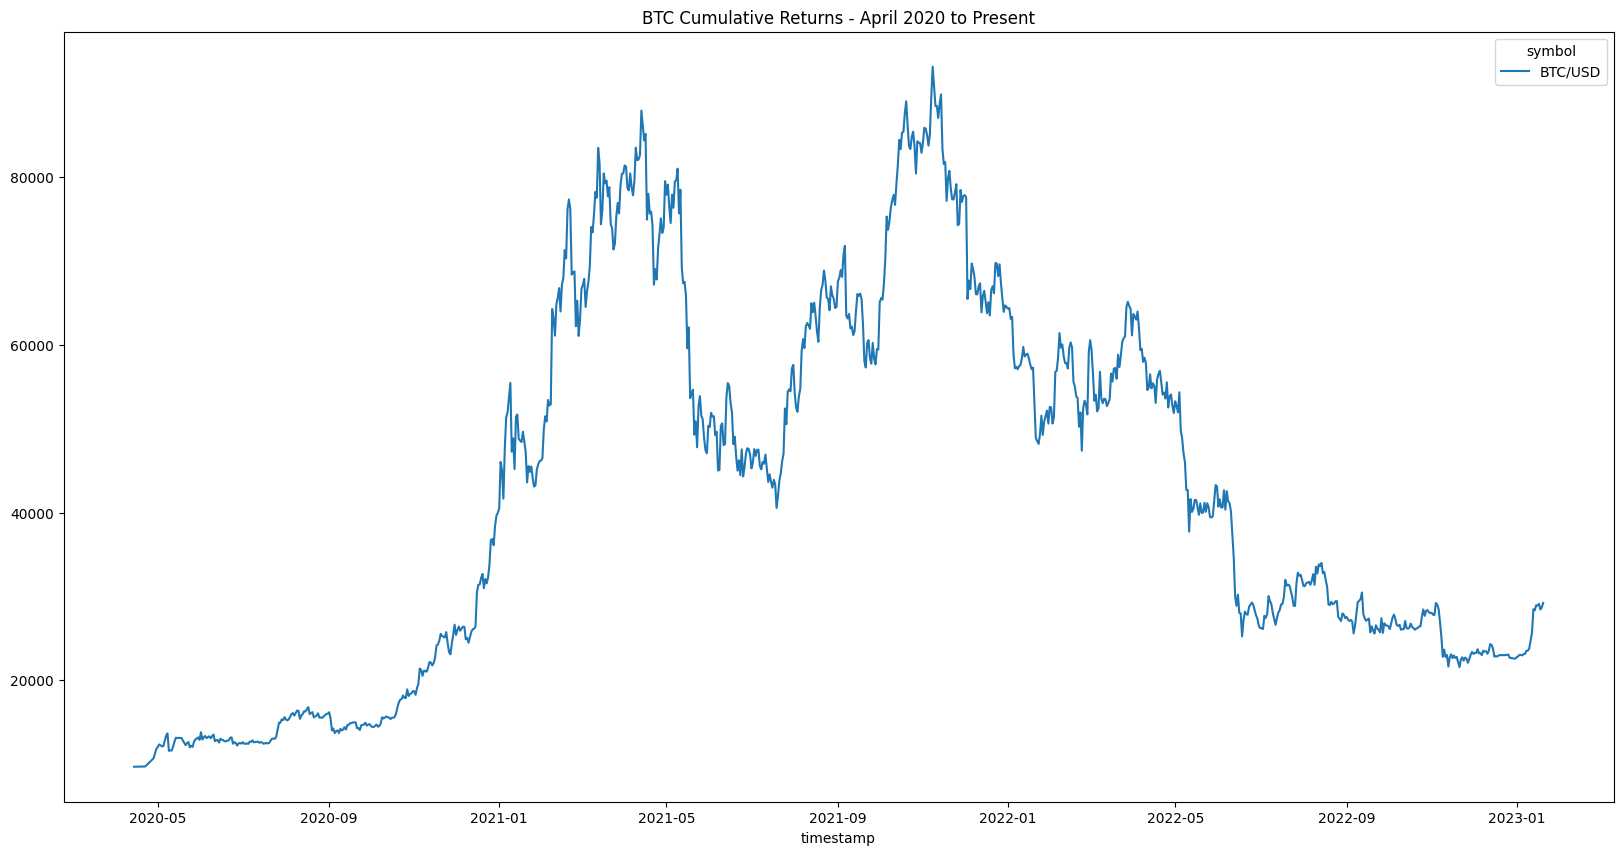

In [52]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(20,10), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [53]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit

symbol,SPY
timestamp,
2020-04-09,10154.014599
2020-04-13,10059.489051
2020-04-14,10357.664234
2020-04-15,10136.861314
2020-04-16,10181.021898
...,...
2023-01-13,14543.795620
2023-01-17,14517.153285
2023-01-18,14287.956204


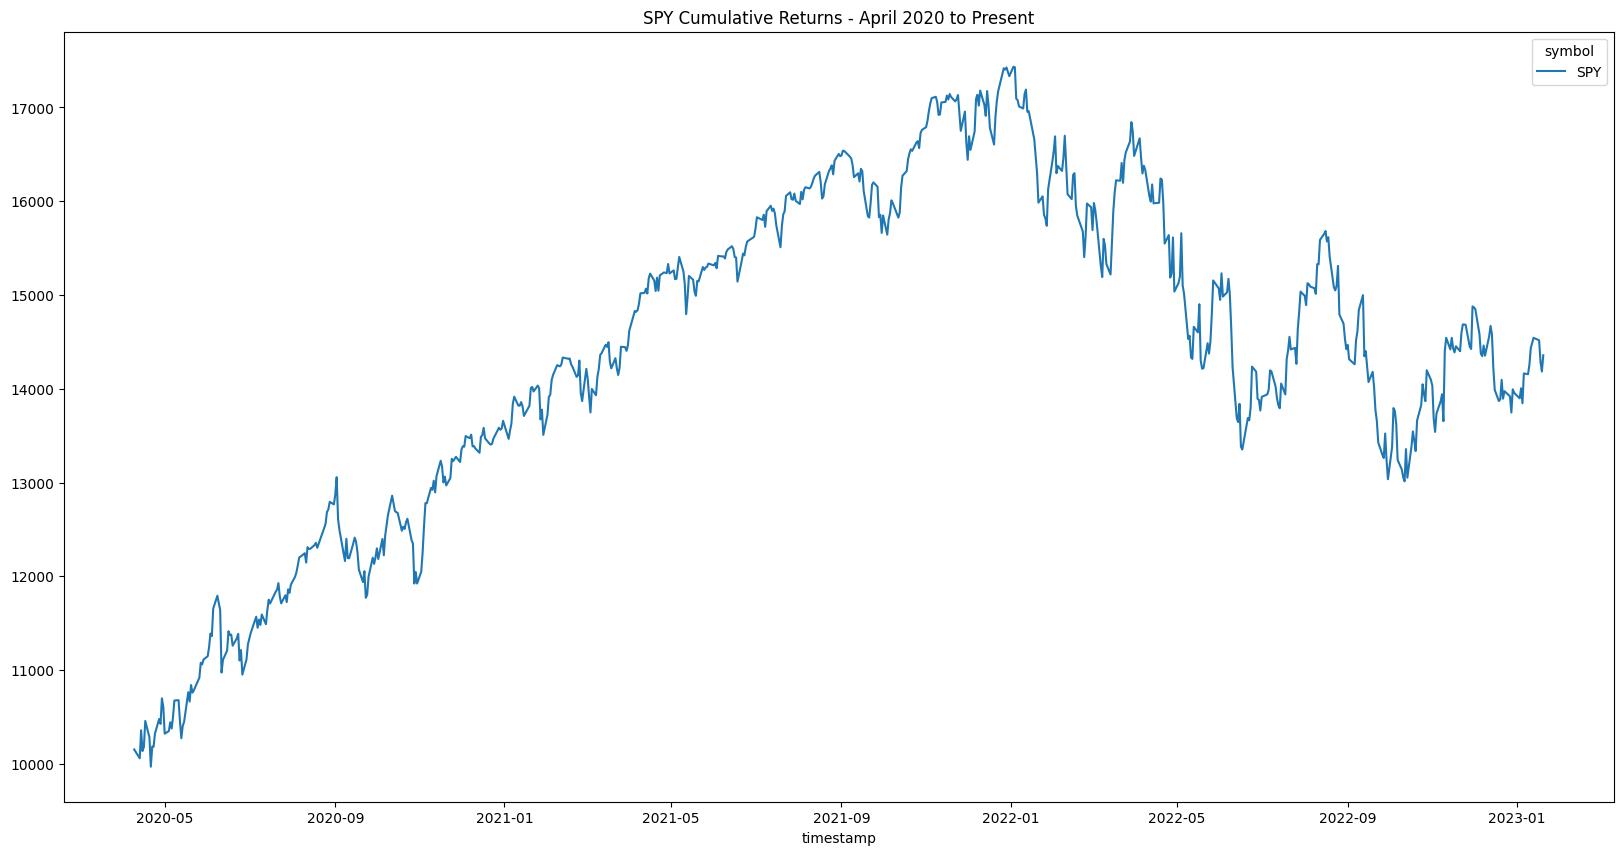

In [54]:
# Plot performance and save to Images
spy_profit.plot(figsize=(20,10), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [55]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit

symbol,GLD
timestamp,
2020-04-09,10254.122211
2020-04-13,10437.116069
2020-04-14,10517.943744
2020-04-15,10475.266731
2020-04-16,10456.514711
...,...
2023-01-13,11559.004203
2023-01-17,11483.349499
2023-01-18,11450.371807


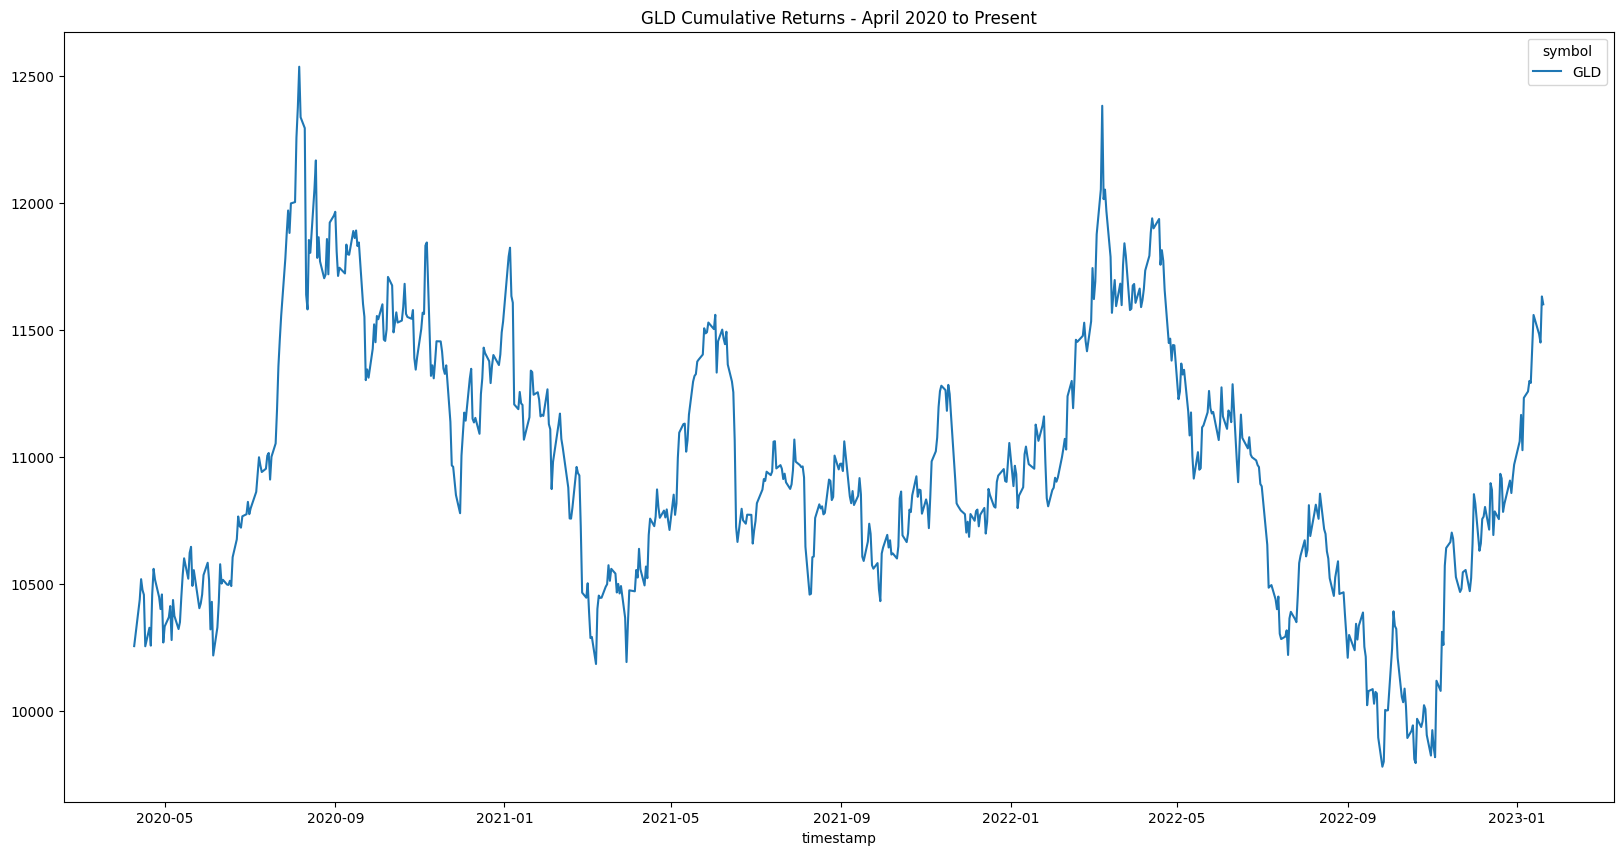

In [56]:
# Plot performance and save to Images
gld_profit.plot(figsize=(20,10), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [57]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit

symbol,TLT
timestamp,
2020-04-09,10018.171906
2020-04-13,9926.706645
2020-04-14,9924.283724
2020-04-15,10187.170634
2020-04-16,10302.865104
...,...
2023-01-13,6466.169968
2023-01-17,6424.374584
2023-01-18,6580.047247


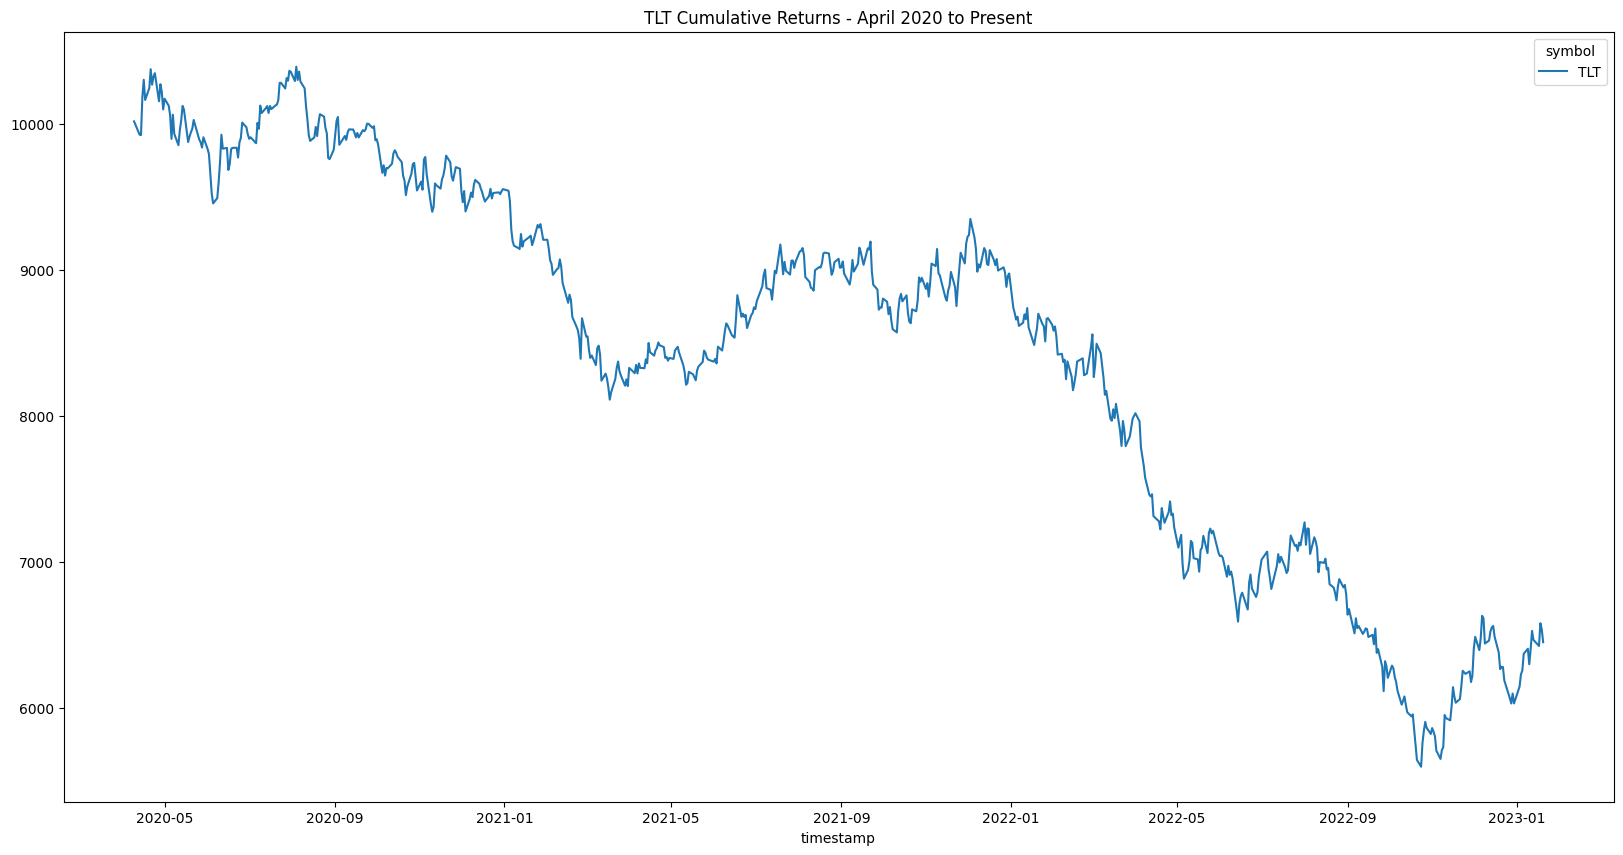

In [58]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(20,10), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

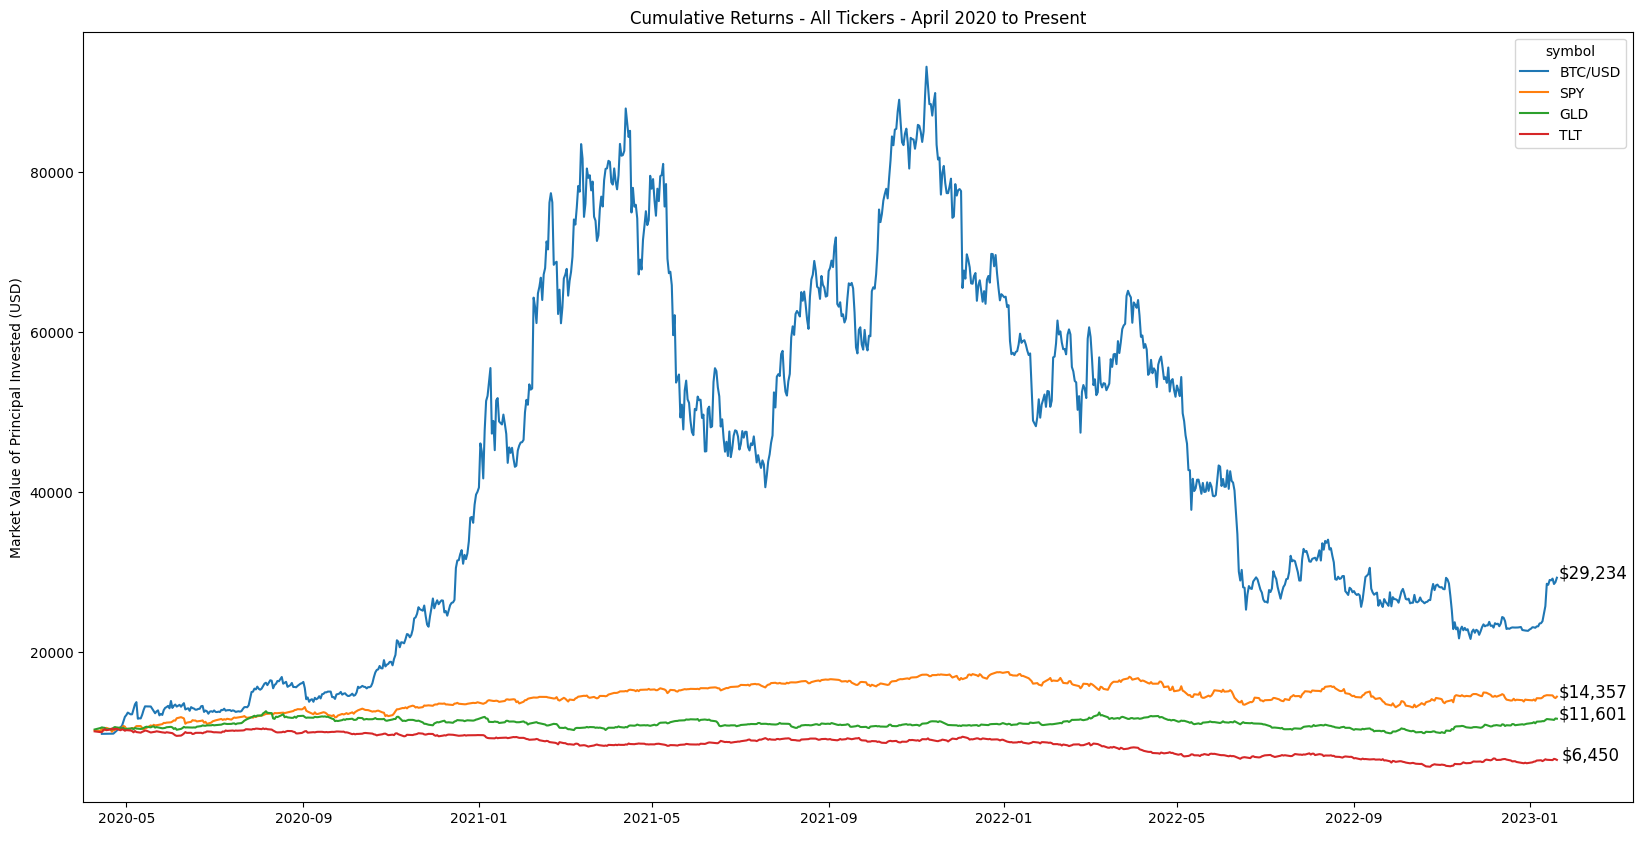

In [59]:
# Overlay of cumulative performances
ax = btc_profit.plot(figsize=(20,10), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text('2023-1-23', tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text('2023-1-21', gld_annotation, f"${gld_annotation:,}", size=12)
ax.text('2023-1-21', spy_annotation, f"${spy_annotation:,}", size=12)
ax.text('2023-1-21', btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', '2023-03-14')
plt.savefig("Images/OverlayCumulativeReturns.png");

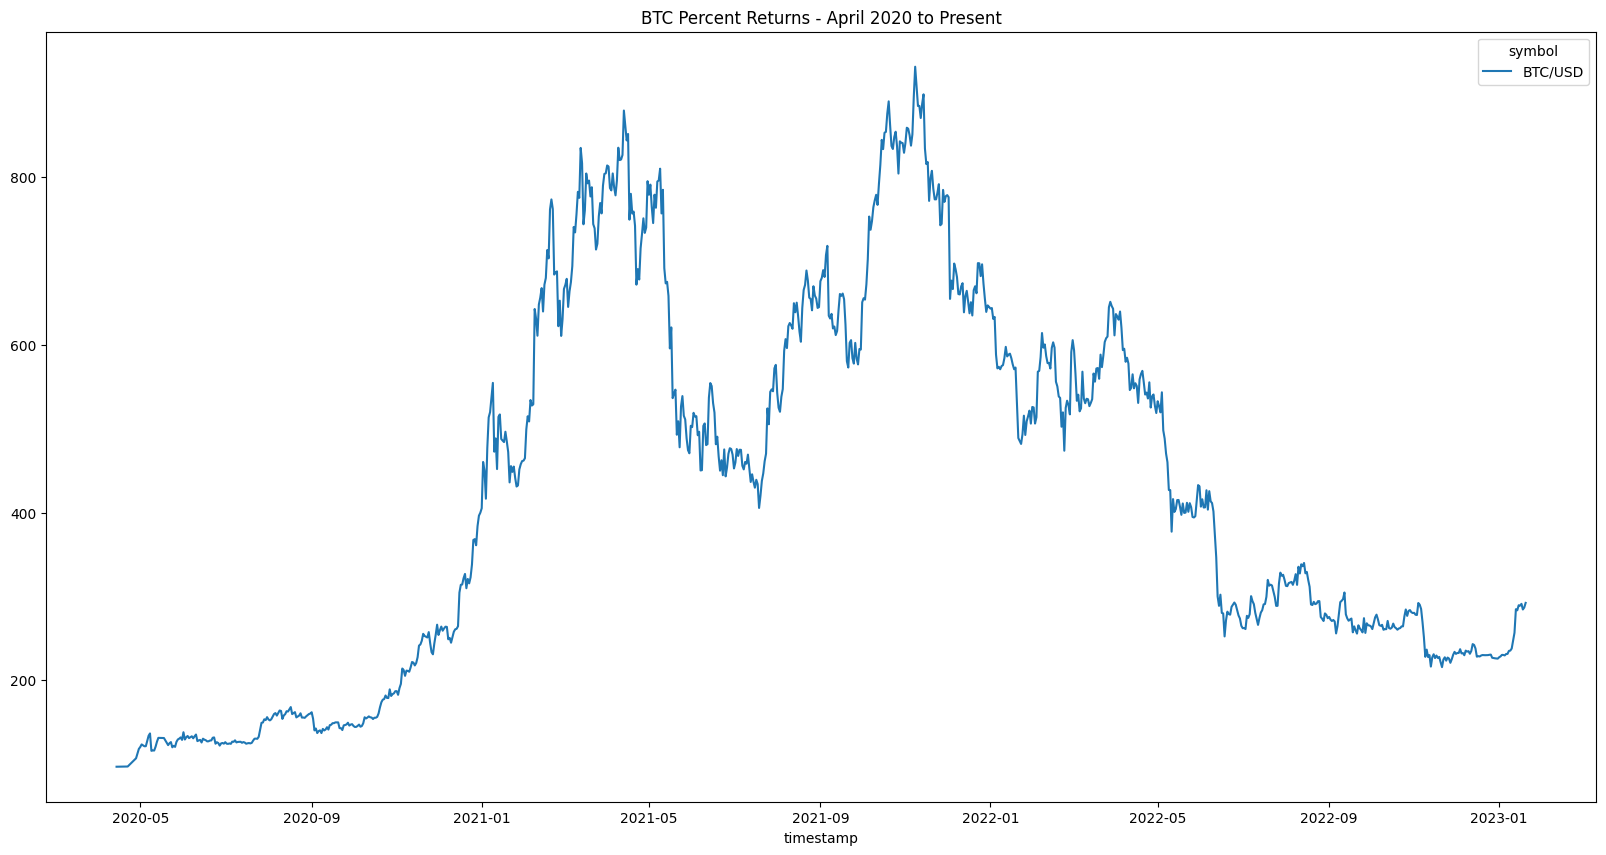

In [60]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(20,10), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

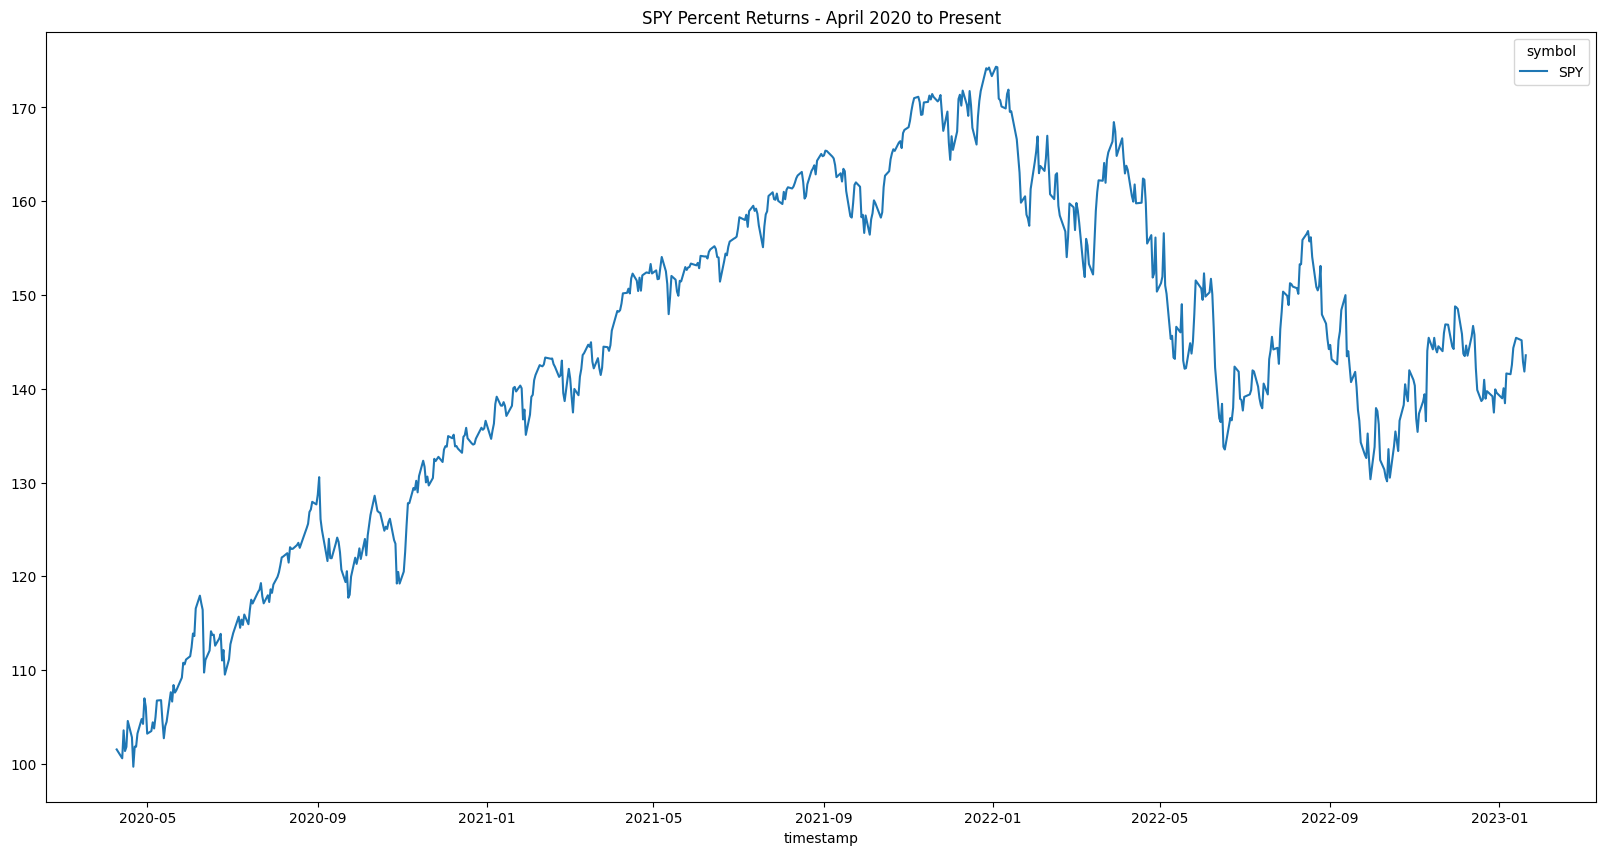

In [61]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(20,10), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

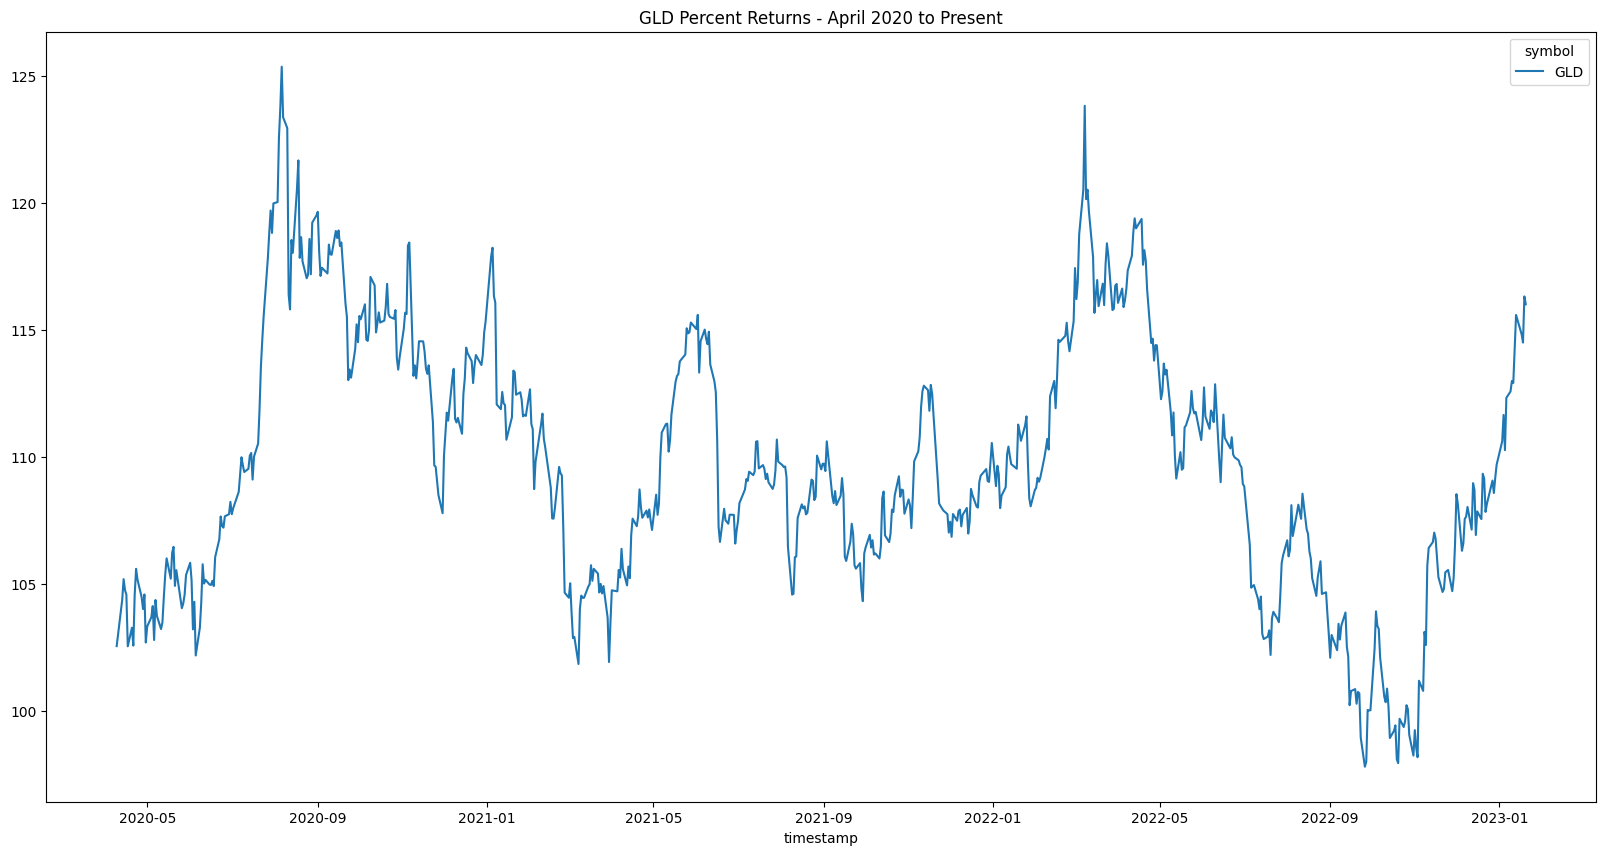

In [62]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(20,10), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

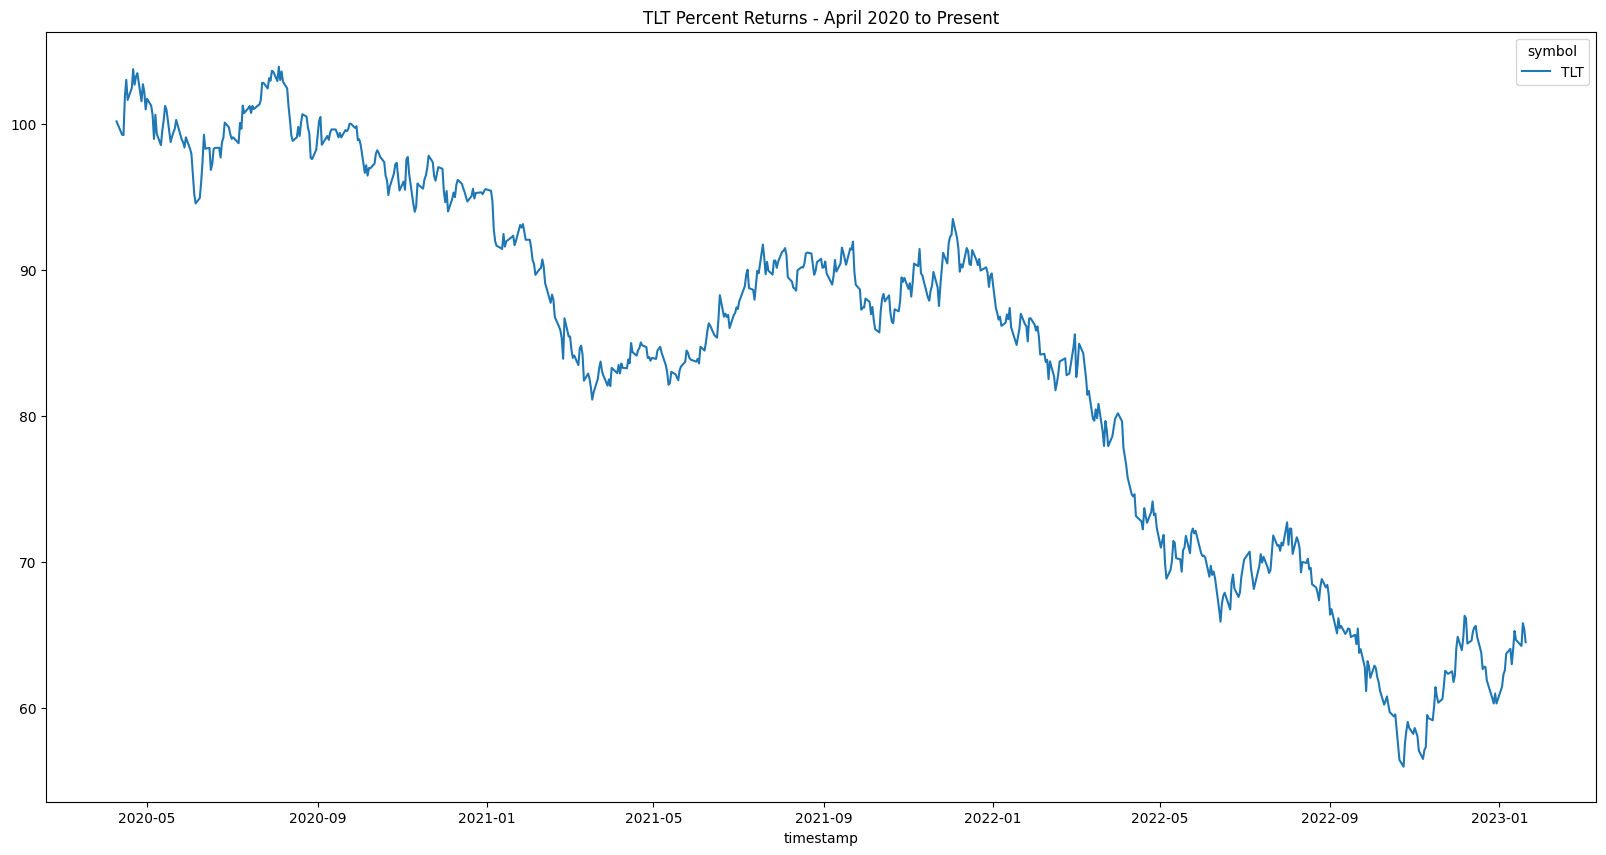

In [63]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(20,10), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

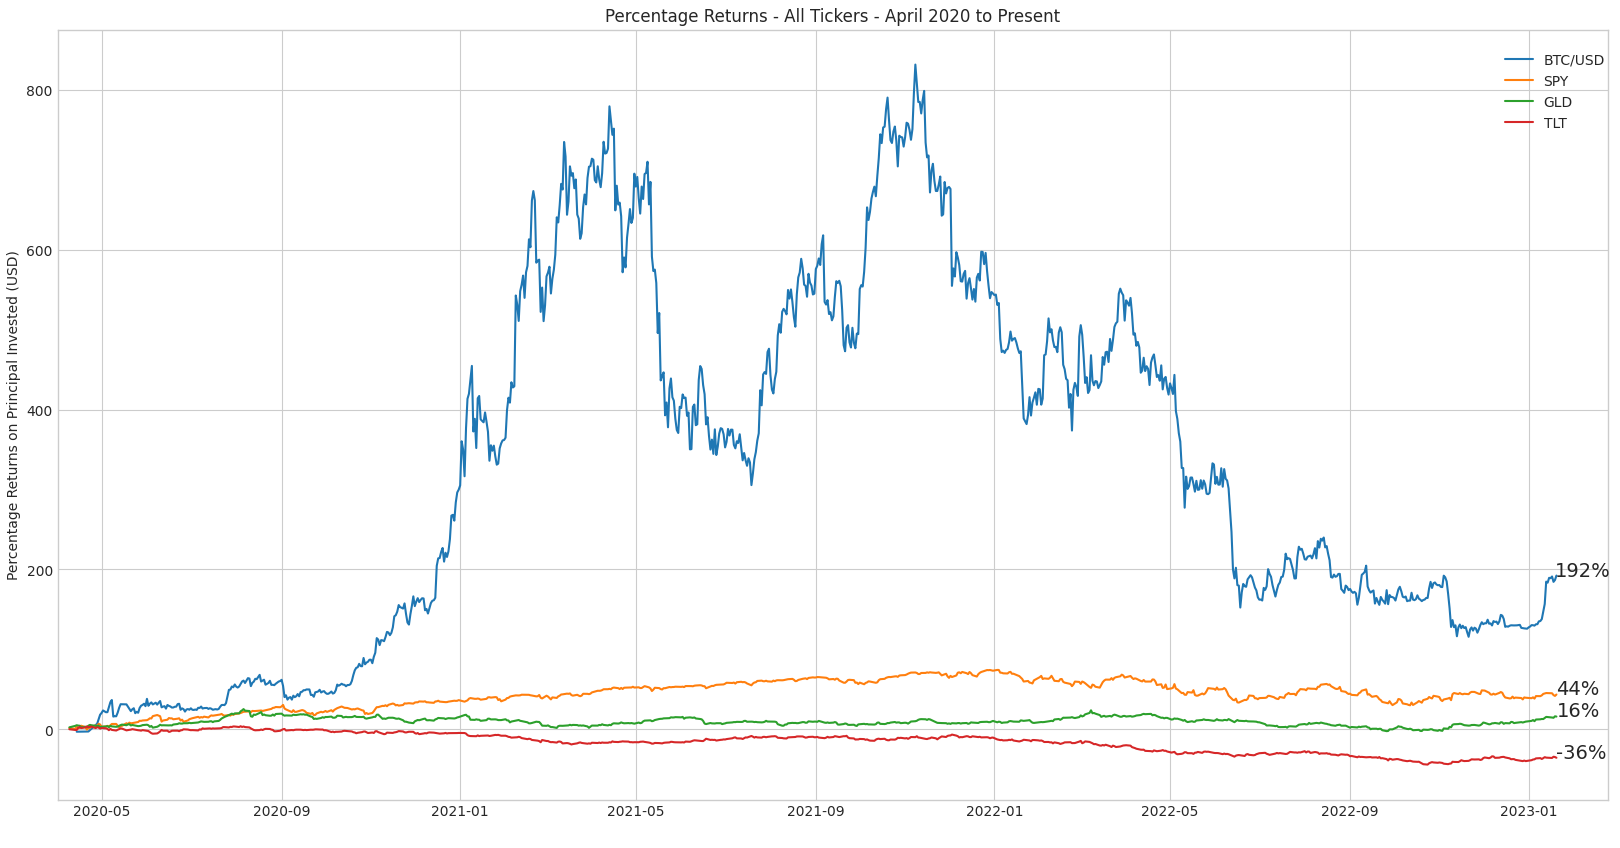

In [64]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(20,10), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text('2023-1-20', TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text('2023-1-20', GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text('2023-1-20', SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text('2023-1-19', BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', '2023-02-24')
    plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [65]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       988 non-null    object 
 1   timestamp    988 non-null    object 
 2   open         988 non-null    float64
 3   high         988 non-null    float64
 4   low          988 non-null    float64
 5   close        988 non-null    float64
 6   volume       988 non-null    float64
 7   trade_count  988 non-null    float64
 8   vwap         988 non-null    float64
dtypes: float64(7), object(2)
memory usage: 69.6+ KB


In [66]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       988 non-null    object        
 1   timestamp    988 non-null    datetime64[ns]
 2   open         988 non-null    float64       
 3   high         988 non-null    float64       
 4   low          988 non-null    float64       
 5   close        988 non-null    float64       
 6   volume       988 non-null    float64       
 7   trade_count  988 non-null    float64       
 8   vwap         988 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 69.6+ KB


In [67]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
5,BTC/USD,2020-05-01,8826.5,8834.00,8716.00,8816.50,0.300700,4.0,8830.673595
29,BTC/USD,2020-06-01,9568.5,10393.00,9515.00,10106.50,5.950700,34.0,9979.759012
59,BTC/USD,2020-07-01,9129.5,9270.00,9129.50,9240.50,5.467900,59.0,9230.826688
90,BTC/USD,2020-08-01,11619.5,12035.00,10594.50,11221.50,0.667400,24.0,11656.094171
116,BTC/USD,2020-09-01,11805.5,12005.50,11805.50,11847.50,0.404900,9.0,11947.180168
146,BTC/USD,2020-10-01,10821.0,10913.00,10477.00,10654.50,5.505900,50.0,10671.754182
177,BTC/USD,2020-11-01,13721.0,13842.50,13688.00,13688.00,1.499100,18.0,13756.809853
207,BTC/USD,2020-12-01,19469.5,19916.00,18222.00,18586.50,32.057500,404.0,19078.142224
238,BTC/USD,2021-01-01,29225.0,29631.00,28750.00,29631.00,25.076500,211.0,29330.826766
269,BTC/USD,2021-02-01,33787.0,34697.00,33145.00,33992.00,815.611700,2005.0,33830.680191


In [68]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset

,timestamp,close
5,2020-05-01,8816.50
29,2020-06-01,10106.50
59,2020-07-01,9240.50
90,2020-08-01,11221.50
116,2020-09-01,11847.50
146,2020-10-01,10654.50
177,2020-11-01,13688.00
207,2020-12-01,18586.50
238,2021-01-01,29631.00
269,2021-02-01,33992.00


In [69]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset

,timestamp,close
0,2020-05-01,8816.50
1,2020-06-01,10106.50
2,2020-07-01,9240.50
3,2020-08-01,11221.50
4,2020-09-01,11847.50
5,2020-10-01,10654.50
6,2020-11-01,13688.00
7,2020-12-01,18586.50
8,2021-01-01,29631.00
9,2021-02-01,33992.00


In [70]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index

,close
timestamp,
2020-05-01,8816.50
2020-06-01,10106.50
2020-07-01,9240.50
2020-08-01,11221.50
2020-09-01,11847.50
2020-10-01,10654.50
2020-11-01,13688.00
2020-12-01,18586.50
2021-01-01,29631.00


In [71]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg

,close
timestamp,
2020-05-01,NaN
2020-06-01,0.146317
2020-07-01,-0.085687
2020-08-01,0.214382
2020-09-01,0.055786
2020-10-01,-0.100696
2020-11-01,0.284715
2020-12-01,0.357868
2021-01-01,0.594222


In [72]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2020-05-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   32 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [73]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-05-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   32 non-null     float64
dtypes: float64(1)
memory usage: 528.0+ bytes


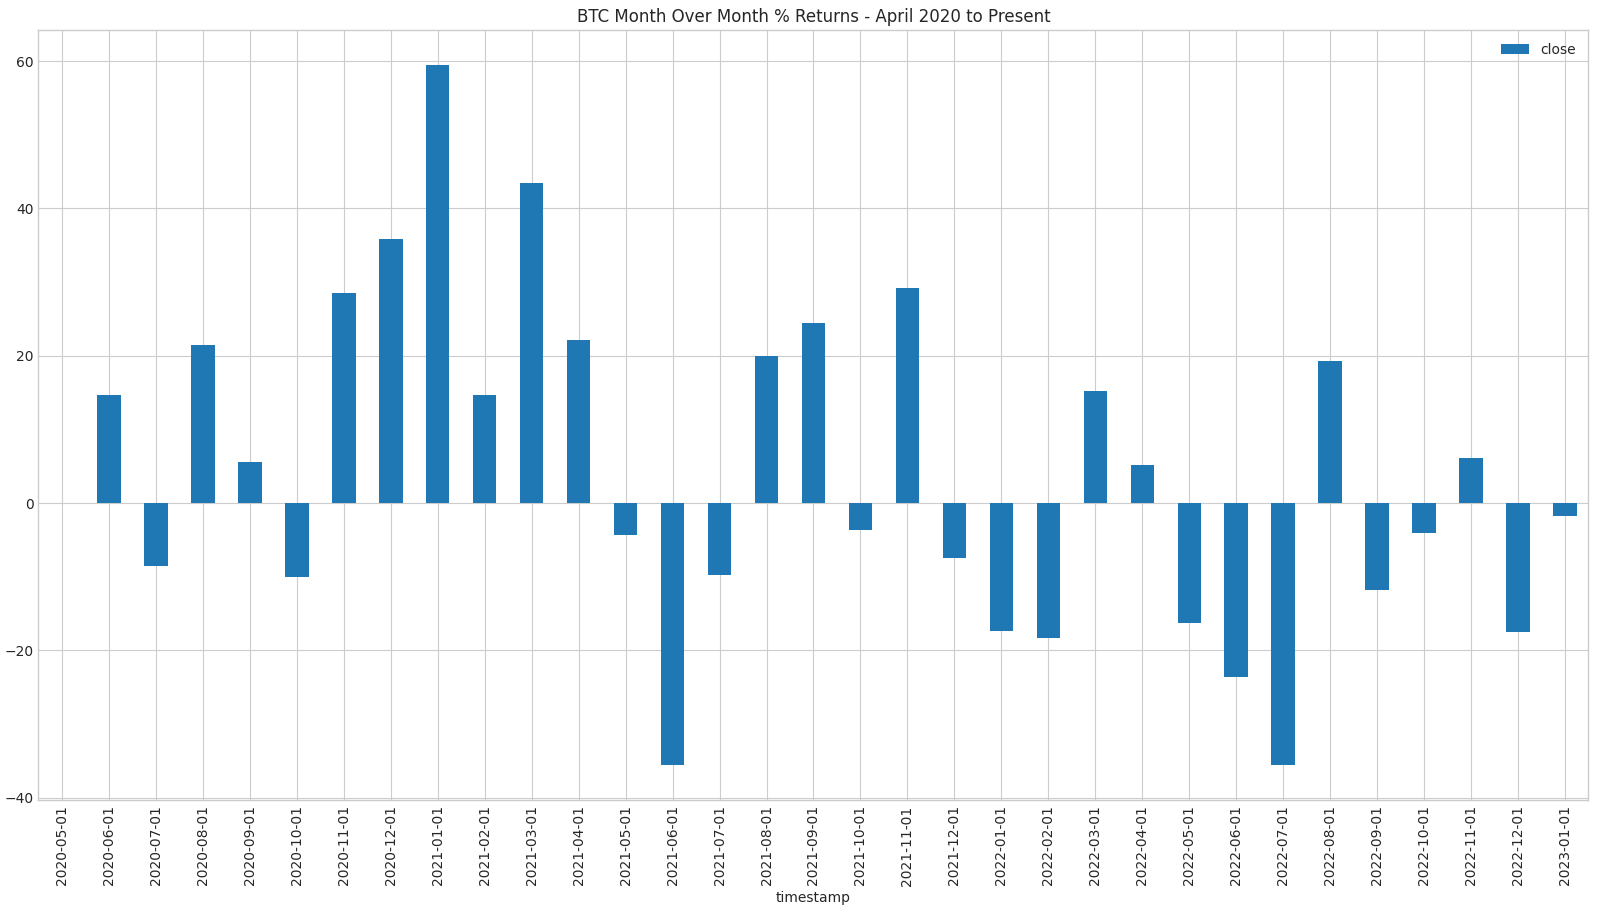

In [74]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(20,10), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [149]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2106 non-null   object        
 1   timestamp    2106 non-null   datetime64[ns]
 2   open         2106 non-null   float64       
 3   high         2106 non-null   float64       
 4   low          2106 non-null   float64       
 5   close        2106 non-null   float64       
 6   volume       2106 non-null   float64       
 7   trade_count  2106 non-null   float64       
 8   vwap         2106 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 148.2+ KB


In [150]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2106 non-null   object        
 1   timestamp    2106 non-null   datetime64[ns]
 2   open         2106 non-null   float64       
 3   high         2106 non-null   float64       
 4   low          2106 non-null   float64       
 5   close        2106 non-null   float64       
 6   volume       2106 non-null   float64       
 7   trade_count  2106 non-null   float64       
 8   vwap         2106 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 148.2+ KB


In [151]:
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,SPY,2020-04-08,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
1,SPY,2020-04-09,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
2,SPY,2020-04-13,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
3,SPY,2020-04-14,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
4,SPY,2020-04-15,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
2101,TLT,2023-01-13,107.10,107.8000,106.3800,106.75,17840329.0,116831.0,106.959244
2102,TLT,2023-01-17,105.67,106.6600,105.6500,106.06,13921156.0,94452.0,106.156371
2103,TLT,2023-01-18,108.46,108.7700,107.1200,108.63,35501528.0,175859.0,108.208918
2104,TLT,2023-01-19,108.10,108.3700,107.4400,107.95,17194653.0,94747.0,107.963038


In [152]:
stock_index = stock_df.set_index('timestamp')
stock_index

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-08,SPY,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
2020-04-09,SPY,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
2020-04-13,SPY,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
2020-04-14,SPY,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
2020-04-15,SPY,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...
2023-01-13,TLT,107.10,107.8000,106.3800,106.75,17840329.0,116831.0,106.959244
2023-01-17,TLT,105.67,106.6600,105.6500,106.06,13921156.0,94452.0,106.156371
2023-01-18,TLT,108.46,108.7700,107.1200,108.63,35501528.0,175859.0,108.208918


In [197]:
stock_index['2021-06-30':'2021-07-02']

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-06-30,SPY,427.21,428.780,427.1800,428.06,64702769.0,315392.0,428.035998
2021-07-01,SPY,428.87,430.600,428.8000,430.43,52968992.0,315119.0,429.721484
2021-07-02,SPY,431.67,434.100,430.5218,433.72,57503965.0,312260.0,432.842859
2021-06-30,GLD,164.57,166.100,164.2900,165.63,7954916.0,55215.0,165.379047
2021-07-01,GLD,166.65,166.880,165.5000,166.20,7427387.0,50788.0,166.141960
2021-07-02,GLD,167.35,167.715,166.4000,167.29,7872766.0,52311.0,167.181069
2021-06-30,TLT,144.25,144.930,144.0700,144.35,15707427.0,76777.0,144.486788
2021-07-01,TLT,143.98,144.310,143.5300,144.17,10767196.0,55429.0,143.845345
2021-07-02,TLT,144.23,145.040,144.1100,145.04,9648629.0,52006.0,144.737576


In [208]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
spy_group_df

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-01,SPY,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
2020-05-01,SPY,285.31,290.6572,281.5200,282.83,125180028.0,639987.0,284.092832
2020-06-01,SPY,303.62,306.2050,303.0600,305.45,56679836.0,316834.0,305.036356
2020-07-01,SPY,309.54,311.8900,309.0700,310.57,72474858.0,418495.0,310.486119
2020-08-03,SPY,328.32,329.6200,327.7300,328.67,53078112.0,288003.0,328.658795
2020-09-01,SPY,350.21,352.7100,349.2400,352.68,54999325.0,295183.0,351.086724
2020-10-01,SPY,337.69,338.7400,335.0100,336.97,88698745.0,442959.0,336.463100
2020-11-02,SPY,330.20,332.3600,327.2400,330.19,86068377.0,582406.0,329.604551
2020-12-01,SPY,365.57,367.6800,364.9300,365.84,74504970.0,378050.0,365.968334


In [209]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,SPY,285.31,290.6572,281.5200,282.83,125180028.0,639987.0,284.092832
2020-06-01,SPY,303.62,306.2050,303.0600,305.45,56679836.0,316834.0,305.036356
2020-07-01,SPY,309.54,311.8900,309.0700,310.57,72474858.0,418495.0,310.486119
2020-08-03,SPY,328.32,329.6200,327.7300,328.67,53078112.0,288003.0,328.658795
2020-09-01,SPY,350.21,352.7100,349.2400,352.68,54999325.0,295183.0,351.086724
2020-10-01,SPY,337.69,338.7400,335.0100,336.97,88698745.0,442959.0,336.463100
2020-11-02,SPY,330.20,332.3600,327.2400,330.19,86068377.0,582406.0,329.604551
2020-12-01,SPY,365.57,367.6800,364.9300,365.84,74504970.0,378050.0,365.968334
2021-01-01,SPY,375.31,375.4500,364.8200,368.97,110210840.0,623063.0,369.337439


In [210]:
# Grouping SPY by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
gld_group_df

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-01,GLD,155.9100,155.9400,154.5900,154.65,7600804.0,60704.0,155.233884
2020-05-01,GLD,157.9500,160.4500,157.8000,159.78,10914334.0,87024.0,159.380639
2020-06-01,GLD,162.9235,163.7400,162.3900,163.66,8155048.0,60202.0,163.323352
2020-07-01,GLD,167.0500,167.0600,165.3400,166.62,13214759.0,86821.0,166.229189
2020-08-03,GLD,185.0500,185.8200,184.2000,185.64,12896999.0,93696.0,185.228945
2020-09-01,GLD,186.9900,186.9900,184.3300,185.05,10689058.0,75982.0,185.384520
2020-10-01,GLD,178.7100,179.5000,178.0375,178.70,10380333.0,65577.0,178.903733
2020-11-02,GLD,177.4499,177.9250,177.1301,177.91,6498368.0,55161.0,177.626697
2020-12-01,GLD,169.7600,170.4800,169.3000,170.19,13555209.0,87946.0,169.921532


In [211]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,GLD,157.9500,160.4500,157.8000,159.78,10914334.0,87024.0,159.380639
2020-06-01,GLD,162.9235,163.7400,162.3900,163.66,8155048.0,60202.0,163.323352
2020-07-01,GLD,167.0500,167.0600,165.3400,166.62,13214759.0,86821.0,166.229189
2020-08-03,GLD,185.0500,185.8200,184.2000,185.64,12896999.0,93696.0,185.228945
2020-09-01,GLD,186.9900,186.9900,184.3300,185.05,10689058.0,75982.0,185.384520
2020-10-01,GLD,178.7100,179.5000,178.0375,178.70,10380333.0,65577.0,178.903733
2020-11-02,GLD,177.4499,177.9250,177.1301,177.91,6498368.0,55161.0,177.626697
2020-12-01,GLD,169.7600,170.4800,169.3000,170.19,13555209.0,87946.0,169.921532
2021-01-01,GLD,181.9700,182.4000,180.9550,182.32,14308436.0,102693.0,181.929522


In [212]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-01,TLT,165.110,166.1900,164.130,165.09,10147077.0,63686.0,165.217491
2020-05-01,TLT,167.500,168.1100,166.440,167.95,10209421.0,52918.0,167.362331
2020-06-01,TLT,162.100,162.4400,161.670,162.28,13353301.0,54793.0,162.363115
2020-07-01,TLT,162.810,163.5600,162.150,163.42,13181262.0,66576.0,163.014043
2020-08-03,TLT,169.240,169.9900,168.970,169.95,9067756.0,61181.0,169.514329
2020-09-01,TLT,161.760,164.0700,161.180,163.86,10587634.0,58232.0,163.138871
2020-10-01,TLT,162.510,163.7401,162.100,163.36,11523874.0,62953.0,163.194508
2020-11-02,TLT,158.700,159.1900,158.330,158.58,10810494.0,57471.0,158.700148
2020-12-01,TLT,158.550,158.7400,156.680,157.50,13666212.0,73359.0,157.524279


In [213]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,TLT,167.500,168.1100,166.440,167.95,10209421.0,52918.0,167.362331
2020-06-01,TLT,162.100,162.4400,161.670,162.28,13353301.0,54793.0,162.363115
2020-07-01,TLT,162.810,163.5600,162.150,163.42,13181262.0,66576.0,163.014043
2020-08-03,TLT,169.240,169.9900,168.970,169.95,9067756.0,61181.0,169.514329
2020-09-01,TLT,161.760,164.0700,161.180,163.86,10587634.0,58232.0,163.138871
2020-10-01,TLT,162.510,163.7401,162.100,163.36,11523874.0,62953.0,163.194508
2020-11-02,TLT,158.700,159.1900,158.330,158.58,10810494.0,57471.0,158.700148
2020-12-01,TLT,158.550,158.7400,156.680,157.50,13666212.0,73359.0,157.524279
2021-01-01,TLT,156.670,158.1800,156.535,157.54,13152865.0,66776.0,157.536581


In [141]:
# Month end dates plus 5/29
month_end_df = stock_df.loc[(stock_df.timestamp.dt.is_month_end) | (stock_df.timestamp.dt.day == 15), :]
month_end_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
4,SPY,2020-04-15,277.570,283.9407,275.460,277.75,121779042.0,711140.0,277.826041
15,SPY,2020-04-30,291.710,293.3239,288.590,290.63,123003721.0,650783.0,290.584103
26,SPY,2020-05-15,282.370,286.3300,281.340,286.29,111232676.0,541431.0,284.426420
46,SPY,2020-06-15,298.020,308.2800,296.740,307.11,135789334.0,779013.0,303.856691
57,SPY,2020-06-30,304.010,310.2000,303.820,308.94,113444772.0,523384.0,307.462538
...,...,...,...,...,...,...,...,...,...
2029,TLT,2022-09-30,104.270,104.8600,102.225,102.45,26484990.0,176869.0,103.216833
2050,TLT,2022-10-31,96.360,96.6200,95.030,96.11,23956265.0,139205.0,95.885319
2061,TLT,2022-11-15,98.250,99.3000,98.110,99.23,26585624.0,155459.0,98.868782
2071,TLT,2022-11-30,101.615,102.7300,101.370,102.73,21594217.0,143566.0,102.184996


In [118]:
month_end_df.tail(33)

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
1628,TLT,2021-03-01,140.660,141.410,140.090,141.06,22050428.0,131299.0,140.676610
1650,TLT,2021-03-31,136.340,136.590,134.980,135.45,19292467.0,97575.0,135.773342
1651,TLT,2021-04-01,136.550,137.620,136.300,137.51,14880298.0,66587.0,137.128607
1671,TLT,2021-04-30,138.507,138.730,137.980,138.64,15684149.0,75392.0,138.439478
1692,TLT,2021-06-01,137.820,138.260,137.250,138.21,11777166.0,61981.0,137.875244
1713,TLT,2021-06-30,144.250,144.930,144.070,144.35,15707427.0,76777.0,144.486788
1714,TLT,2021-07-01,143.980,144.310,143.530,144.17,10767196.0,55429.0,143.845345
1756,TLT,2021-08-31,149.670,150.090,148.500,148.83,15253807.0,80103.0,148.996281
1757,TLT,2021-09-01,149.270,149.390,148.490,148.89,10798246.0,62840.0,148.892889
1777,TLT,2021-09-30,144.100,144.515,143.650,144.32,22513240.0,109556.0,144.155056


In [82]:
# Filtering for month start dates
spy_monthly = stock_df[if stock_df['timestamp'] == stock_df['timestamp'].dt.is_month_start 
                       then stock_df['timestamp'].dt.is_month_start
                      
                      
                      
                      
                      ] 
spy_monthly

SyntaxError: invalid syntax (3874756162.py, line 2)

In [ ]:
# Subset of SPY only
spy_df = spy_monthly.loc[(spy_monthly.symbol == 'SPY'), :]
spy_df